In this notebook, we will cover the following cases for studying the **covariation** between two variables:

* [A categorical and continuous variable](#A-categorical-and-continuous-variable)
* [Two categorical variables](#Two-categorical-variables)
* [Two continuous variables](#Two-continuous-variables)

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# A categorical and continuous variable

In [2]:
print(mpg)

# A tibble: 234 × 11
   manufacturer      model displ  year   cyl      trans   drv   cty   hwy    fl
          <chr>      <chr> <dbl> <int> <int>      <chr> <chr> <int> <int> <chr>
1          audi         a4   1.8  1999     4   auto(l5)     f    18    29     p
2          audi         a4   1.8  1999     4 manual(m5)     f    21    29     p
3          audi         a4   2.0  2008     4 manual(m6)     f    20    31     p
4          audi         a4   2.0  2008     4   auto(av)     f    21    30     p
5          audi         a4   2.8  1999     6   auto(l5)     f    16    26     p
6          audi         a4   2.8  1999     6 manual(m5)     f    18    26     p
7          audi         a4   3.1  2008     6   auto(av)     f    18    27     p
8          audi a4 quattro   1.8  1999     4 manual(m5)     4    18    26     p
9          audi a4 quattro   1.8  1999     4   auto(l5)     4    16    25     p
10         audi a4 quattro   2.0  2008     4 manual(m6)     4    20    28     p
# ... with 224 more

We can map a categorical variable to, say, the **color** aesthetic in a frequency polygon of a continuous variable.

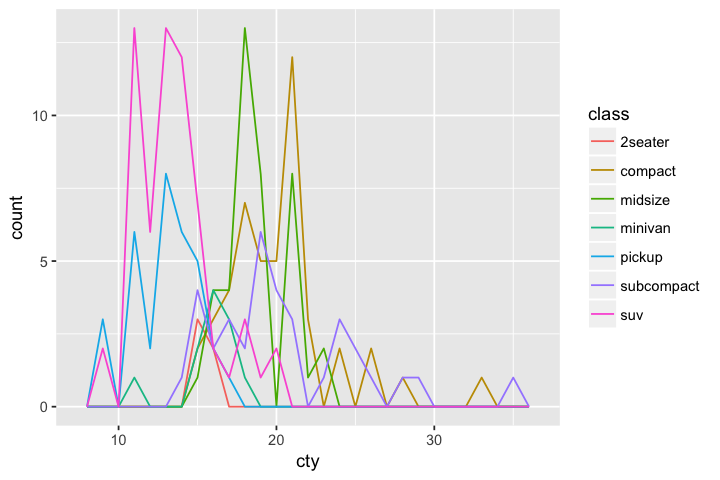

In [3]:
ggplot(data = mpg) +
    geom_freqpoly(mapping = aes(x = cty, color = class), binwidth = 1)

Doing the same for a histogram does not have a good effect.

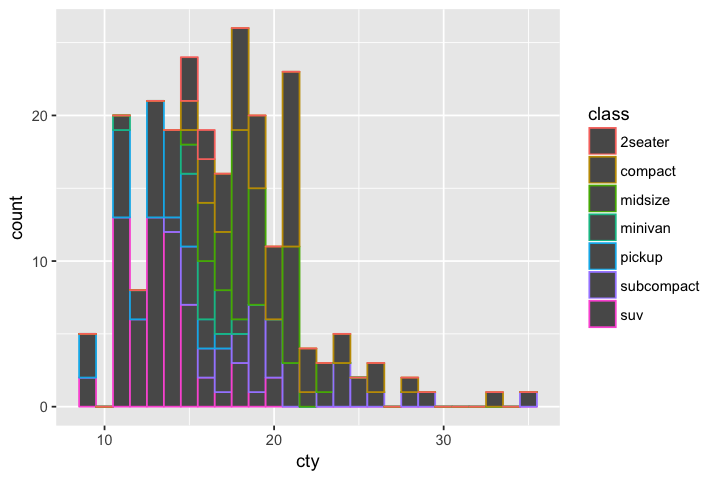

In [4]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, color = class), binwidth = 1)

Changing the **fill** aesthetic to the **color** aesthetic improves the appearance but the plot remains problematic.

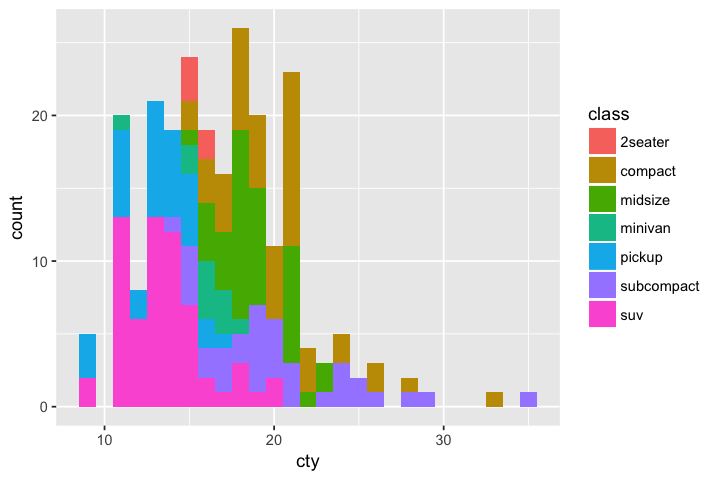

In [5]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, fill = class), binwidth = 1)

Another thing we can do with a categorical, continuous pair is to use a **boxplot**.

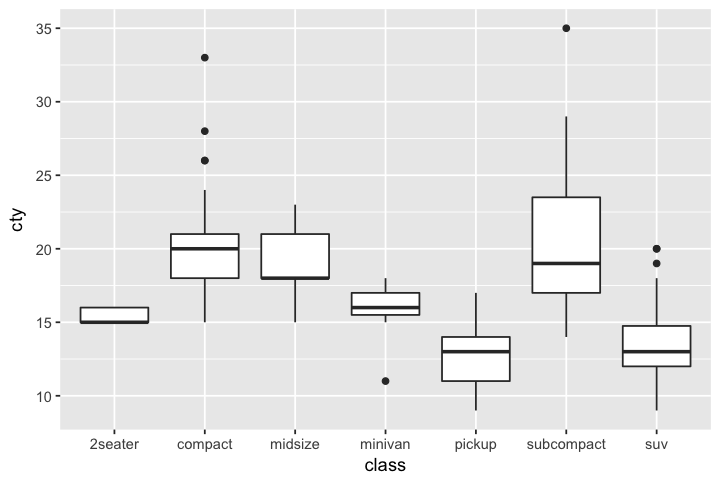

In [6]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = class, y = cty))

* The lower and upper hinges correspond to the first and third quartiles (the 25th and 75th percentiles).
* The upper whisker extends from the hinge to the largest value no further than 1.5 * IQR from the hinge (where IQR is the inter-quartile range, or distance between the first and third quartiles).
* The lower whisker extends from the hinge to the smallest value at most 1.5 * IQR of the hinge.
* Data beyond the end of the whiskers are called "outlying" points and are plotted individually.

To replot with `class` values listed in order of the median value for `cty`, we can use the `reorder()` function.

```
reorder(cat, con, FUN = median)
```

reorders the levels of the categorical variable `cat` according the continuous variable `con`. The function `median()` is applied the the `con` values corresponding to a fixed level of `cat`. Default value of the `FUN` argument is `mean`.

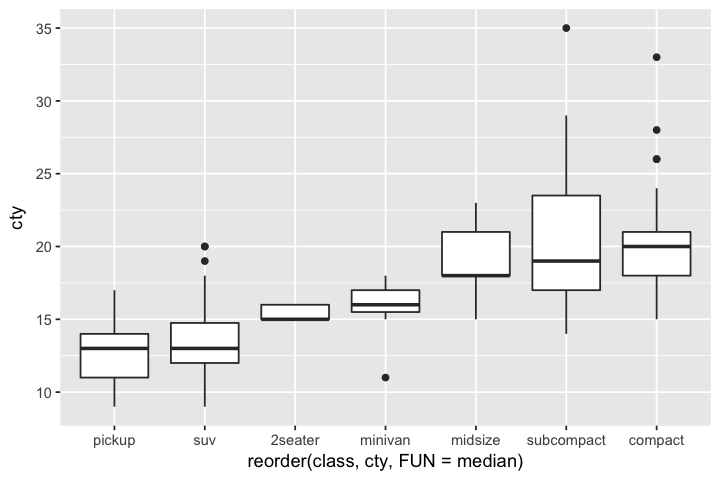

In [7]:
ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty))

We can flip the x, y axes if the categorical level names are long

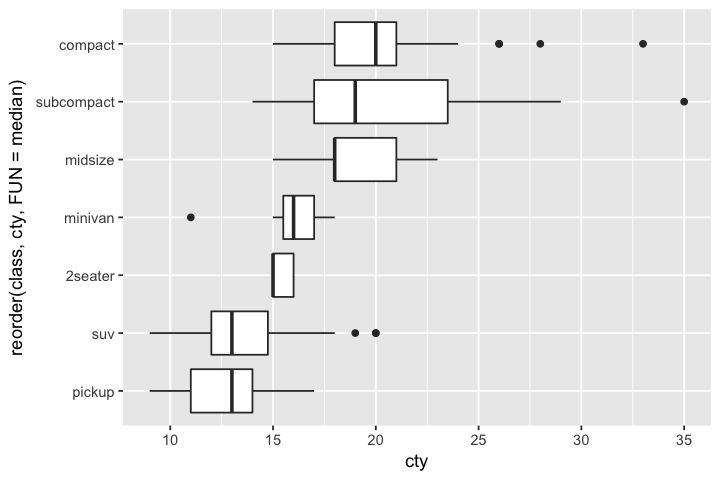

In [8]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) +
    coord_flip()

Contrast this with faceting the `cty` histogram on the `class` variable.

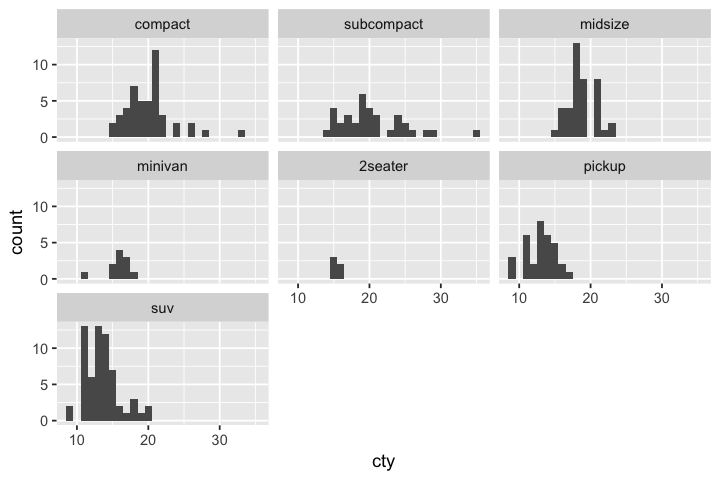

In [9]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 1) +
    facet_wrap(~ reorder(class, desc(cty), FUN = median))

# Two categorical variables

`geom_count` can be used to visualize two categorical variables.

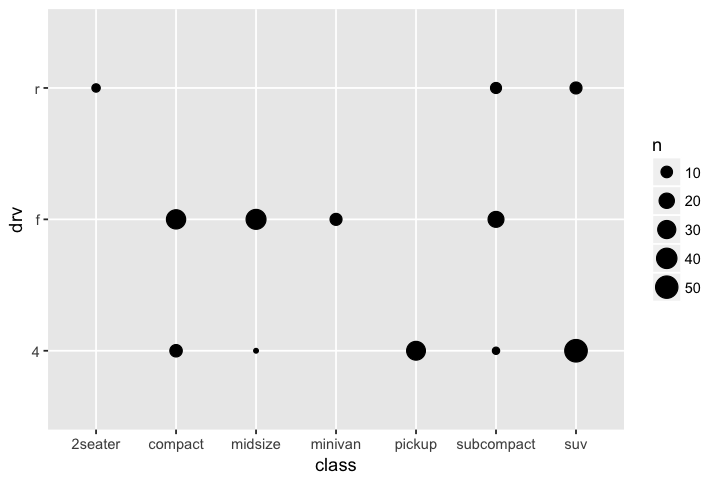

In [10]:
ggplot(data = mpg) +
    geom_count(mapping = aes(x = class, y = drv))

We can compute these numbers using `count()`.

In [11]:
mpg %>%
    count(class, drv)

class,drv,n
2seater,r,5
compact,4,12
compact,f,35
midsize,4,3
midsize,f,38
minivan,f,11
pickup,4,33
subcompact,4,4
subcompact,f,22
subcompact,r,9


These counts can be fed to other geometries.

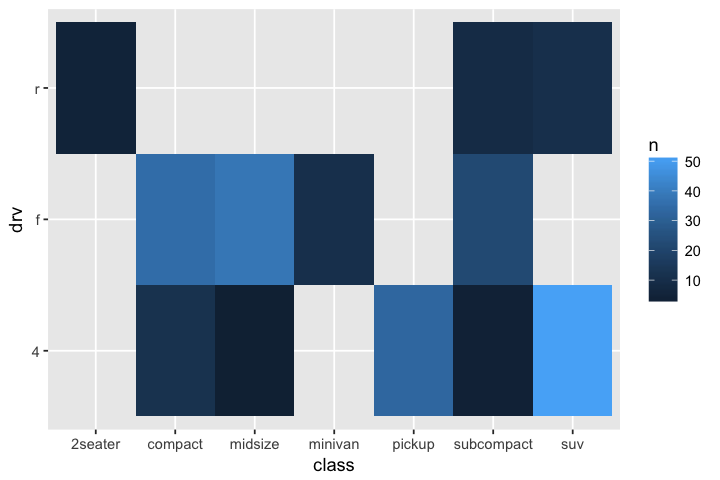

In [12]:
mpg %>%
    count(class, drv) %>%
    ggplot() +
        geom_tile(mapping = aes(x = class, y = drv, fill = n))

# Two continuous variables

We already know a lot about scatterplots. Once you have too many points, you may want to use `geom_bin2d` or `geom_hex`.

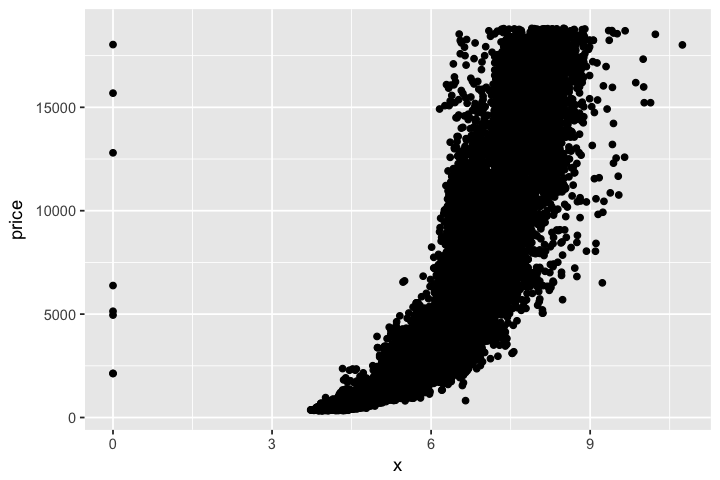

In [13]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = x, y = price))

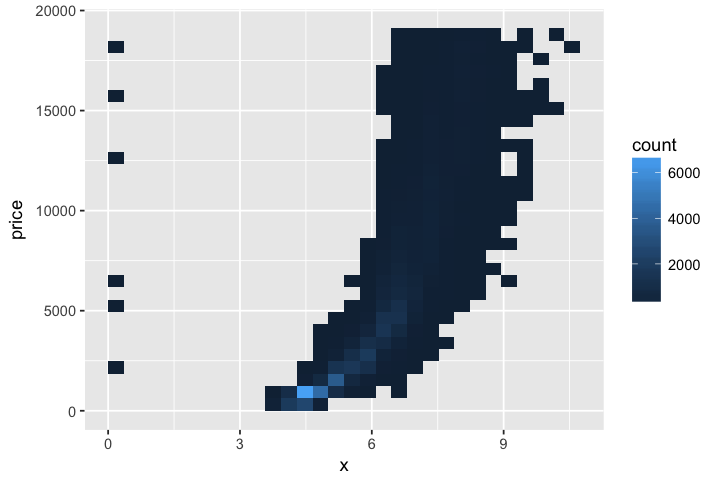

In [14]:
ggplot(data = diamonds) +
    geom_bin2d(mapping = aes(x = x, y = price))

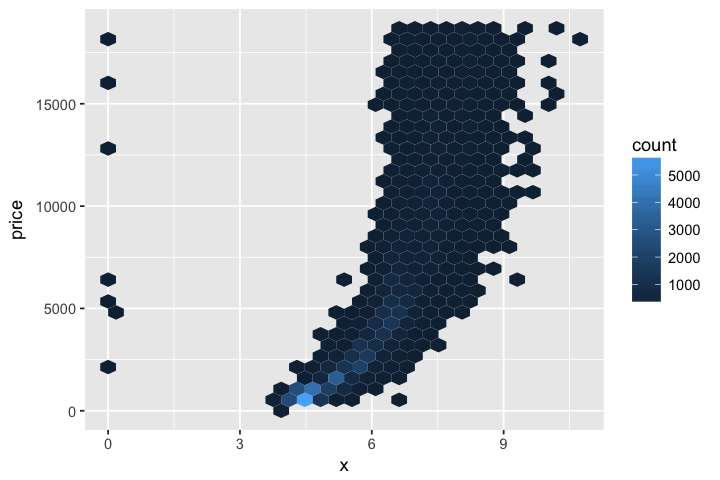

In [15]:
ggplot(data = diamonds) +
    geom_hex(mapping = aes(x = x, y = price))